In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-analytics-dataset/electric_vehicle_analytics.csv


In [2]:
df = pd.read_csv("/kaggle/input/electric-vehicle-analytics-dataset/electric_vehicle_analytics.csv")
df.head()

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033


## Exploratory Data Analysis (EDA)

We begin by exploring the dataset to understand its structure, distributions, and key patterns.


In [3]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Distinct counts for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} distinct values")


Dataset shape: (3000, 25)
Vehicle_ID: 3000 distinct values
Make: 10 distinct values
Model: 23 distinct values
Year: 10 distinct values
Region: 4 distinct values
Vehicle_Type: 4 distinct values
Battery_Capacity_kWh: 878 distinct values
Battery_Health_%: 301 distinct values
Range_km: 547 distinct values
Charging_Power_kW: 1708 distinct values
Charging_Time_hr: 452 distinct values
Charge_Cycles: 1455 distinct values
Energy_Consumption_kWh_per_100km: 1165 distinct values
Mileage_km: 2979 distinct values
Avg_Speed_kmh: 693 distinct values
Max_Speed_kmh: 120 distinct values
Acceleration_0_100_kmh_sec: 644 distinct values
Temperature_C: 501 distinct values
Usage_Type: 3 distinct values
CO2_Saved_tons: 1895 distinct values
Maintenance_Cost_USD: 1481 distinct values
Insurance_Cost_USD: 1547 distinct values
Electricity_Cost_USD_per_kWh: 28 distinct values
Monthly_Charging_Cost_USD: 2953 distinct values
Resale_Value_USD: 2791 distinct values


In [4]:
# Null / Missing values check
null_summary = pd.DataFrame({
    "Total_Values": df.shape[0],
    "Missing_Values": df.isnull().sum(),
    "Missing_%": (df.isnull().sum() / df.shape[0]) * 100,
    "Unique_Values": df.nunique()
})

null_summary = null_summary.sort_values(by="Missing_Values", ascending=False)
null_summary


,Total_Values,Missing_Values,Missing_%,Unique_Values
Vehicle_ID,3000,0,0.0,3000
Mileage_km,3000,0,0.0,2979
Monthly_Charging_Cost_USD,3000,0,0.0,2953
Electricity_Cost_USD_per_kWh,3000,0,0.0,28
Insurance_Cost_USD,3000,0,0.0,1547
Maintenance_Cost_USD,3000,0,0.0,1481
CO2_Saved_tons,3000,0,0.0,1895
Usage_Type,3000,0,0.0,3
Temperature_C,3000,0,0.0,501
Acceleration_0_100_kmh_sec,3000,0,0.0,644


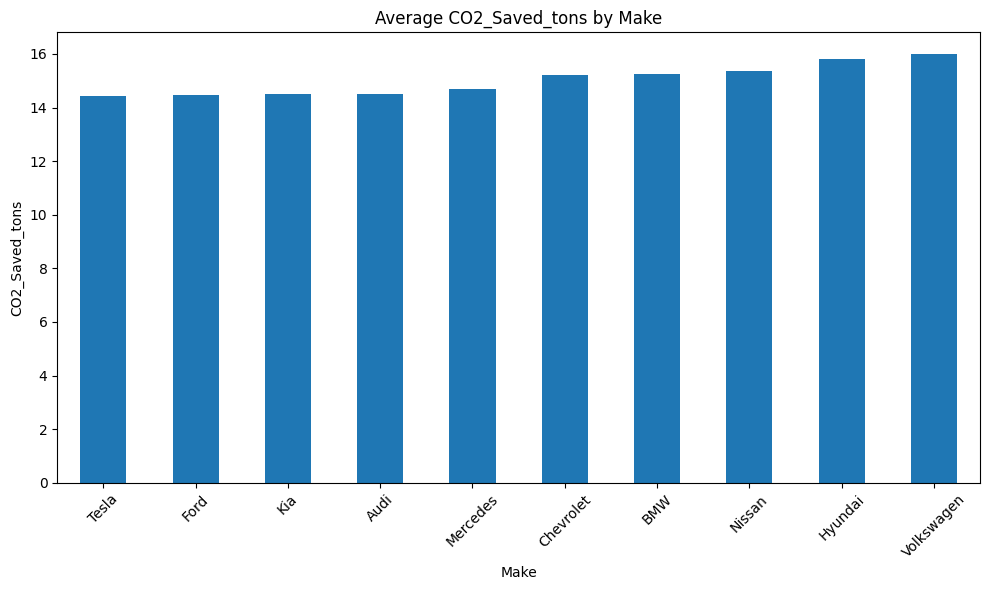

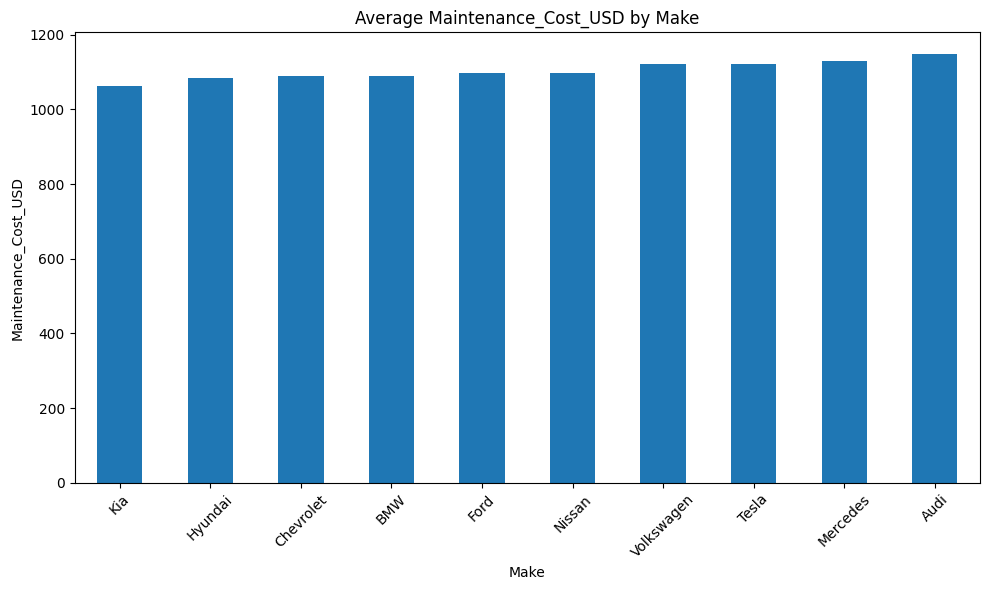

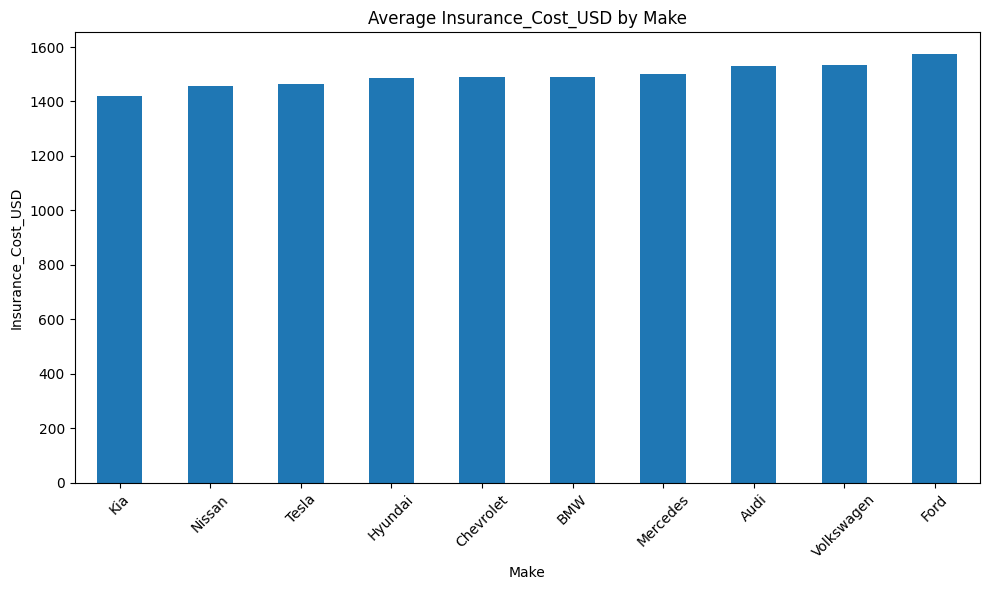

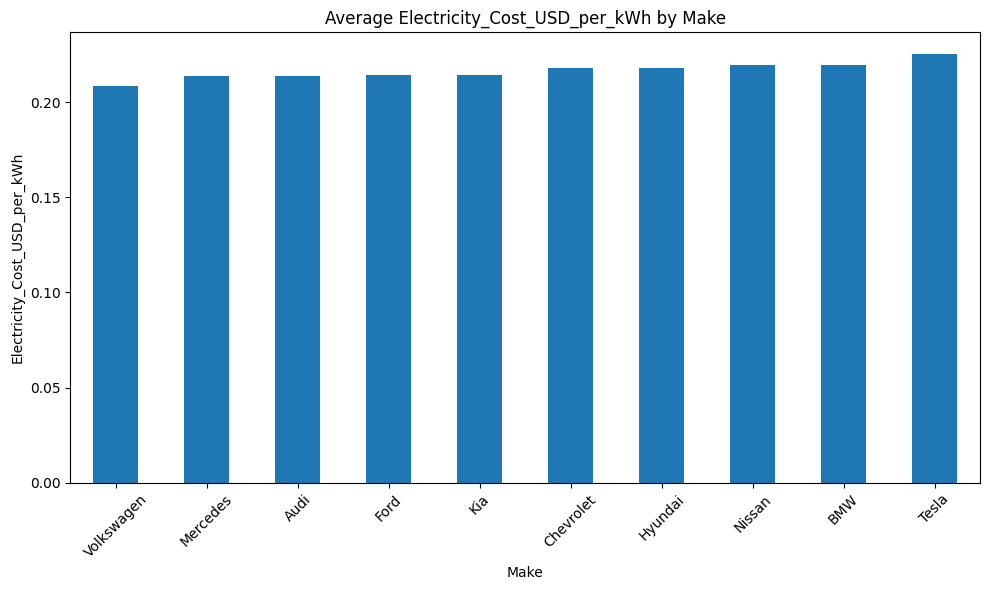

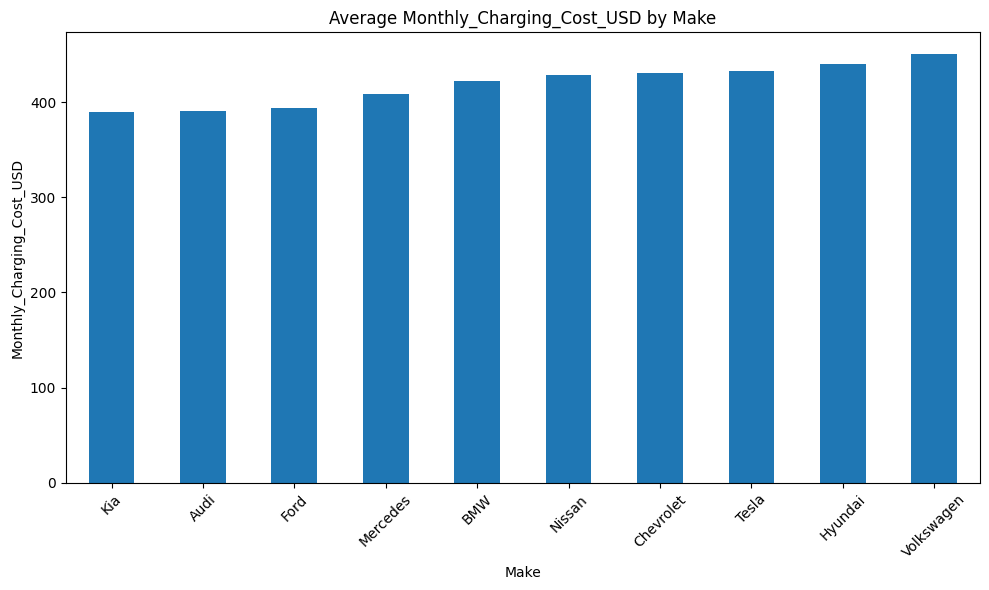

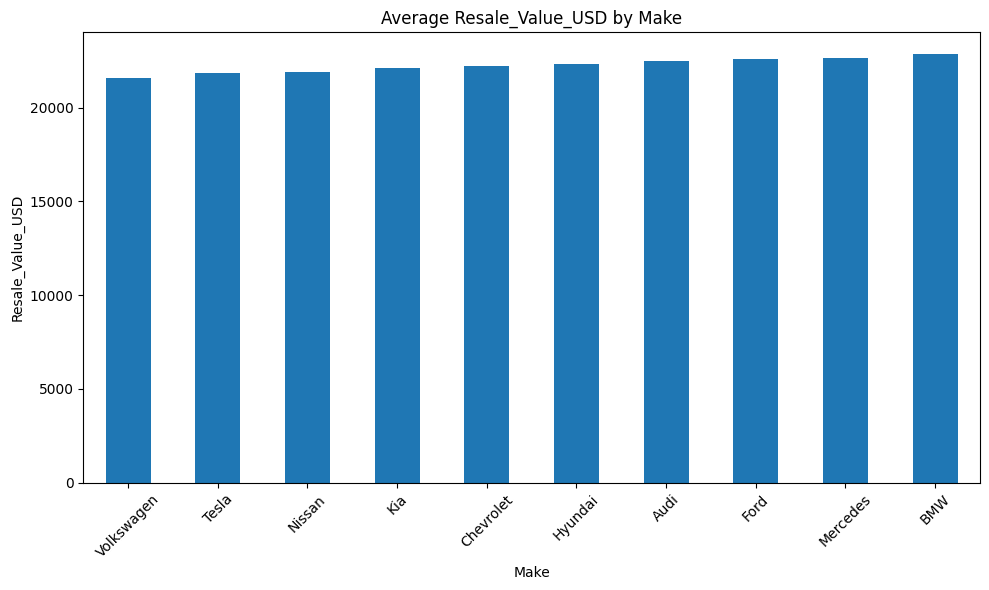

In [5]:

# Columns to analyze
cols_to_plot = [
    "CO2_Saved_tons",
    "Maintenance_Cost_USD",
    "Insurance_Cost_USD",
    "Electricity_Cost_USD_per_kWh",
    "Monthly_Charging_Cost_USD",
    "Resale_Value_USD"
]

# Plot average values grouped by Make
for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    df.groupby("Make")[col].mean().sort_values().plot(kind="bar")
    plt.title(f"Average {col} by Make")
    plt.ylabel(col)
    plt.xlabel("Make")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## EDA Results: Brand Comparison

From the analysis of average values grouped by **Make (brand)**, we observe the following:

- **CO₂ Saved (tons):**
  - All brands contribute to significant CO₂ savings.
  - Volkswagen, Hyundai, and Nissan show slightly higher averages compared to others, while Tesla, Ford, and Kia are on the lower end.

- **Maintenance Cost (USD):**
  - Kia and Hyundai appear to have the **lowest average maintenance costs**, making them more economical.
  - Audi and Mercedes rank higher, indicating more expensive upkeep.

- **Insurance Cost (USD):**
  - Kia and Nissan offer **lower insurance costs**.
  - Premium brands like Audi, Volkswagen, and Ford show higher insurance averages.

- **Electricity Cost per kWh (USD):**
  - The variation is relatively small across brands.
  - Tesla and BMW show slightly higher electricity costs per kWh compared to Volkswagen and Mercedes.

- **Monthly Charging Cost (USD):**
  - Kia and Audi show lower average monthly charging costs.
  - BMW, Mercedes, and Volkswagen show higher costs, aligning with their generally higher-performance vehicles.

- **Resale Value (USD):**
  - BMW and Mercedes maintain the **highest resale value**.
  - Volkswagen, Nissan, and Kia are on the lower side, suggesting faster depreciation.

### Key Insights
- **Economical Choices:** Kia and Hyundai stand out as cost-effective brands with lower maintenance, insurance, and charging costs.
- **Premium Segment:** BMW and Mercedes demand higher costs but reward with higher resale value.
- **Balanced Options:** Volkswagen and Nissan perform well in CO₂ savings and resale but come with moderate to high ownership costs.


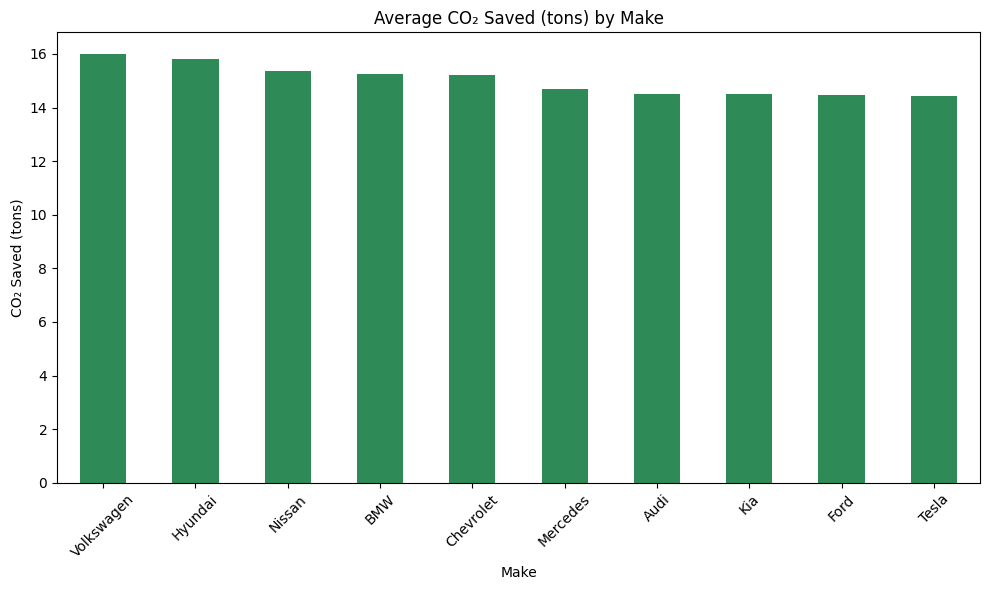

The most eco-friendly brand on average is: Volkswagen


In [6]:
import matplotlib.pyplot as plt

# Group by Make and calculate average CO2 saved
co2_by_make = df.groupby("Make")["CO2_Saved_tons"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
co2_by_make.plot(kind="bar", color="seagreen")
plt.title("Average CO₂ Saved (tons) by Make")
plt.ylabel("CO₂ Saved (tons)")
plt.xlabel("Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the most eco-friendly brand
most_eco = co2_by_make.idxmax()
print(f"The most eco-friendly brand on average is: {most_eco}")


## CO₂ Savings by Brand

The analysis of **average CO₂ saved per vehicle** highlights clear differences across brands:

- **Volkswagen** leads as the most eco-friendly brand, with the highest average CO₂ savings per vehicle.
- **Hyundai** and **Nissan** follow closely, also demonstrating strong environmental performance.
- **BMW** and **Chevrolet** rank in the middle, showing balanced performance between efficiency and CO₂ reduction.
- **Mercedes, Audi, Kia, Ford, and Tesla** show slightly lower averages compared to the leaders, but still contribute significantly to emissions reduction.

### Key Insight
- **Volkswagen vehicles** stand out in terms of sustainability, making them the strongest performer in CO₂ savings.
- While all brands provide substantial CO₂ reductions, the data suggests that Volkswagen and Hyundai currently set the benchmark for eco-friendly electric vehicles in this dataset.


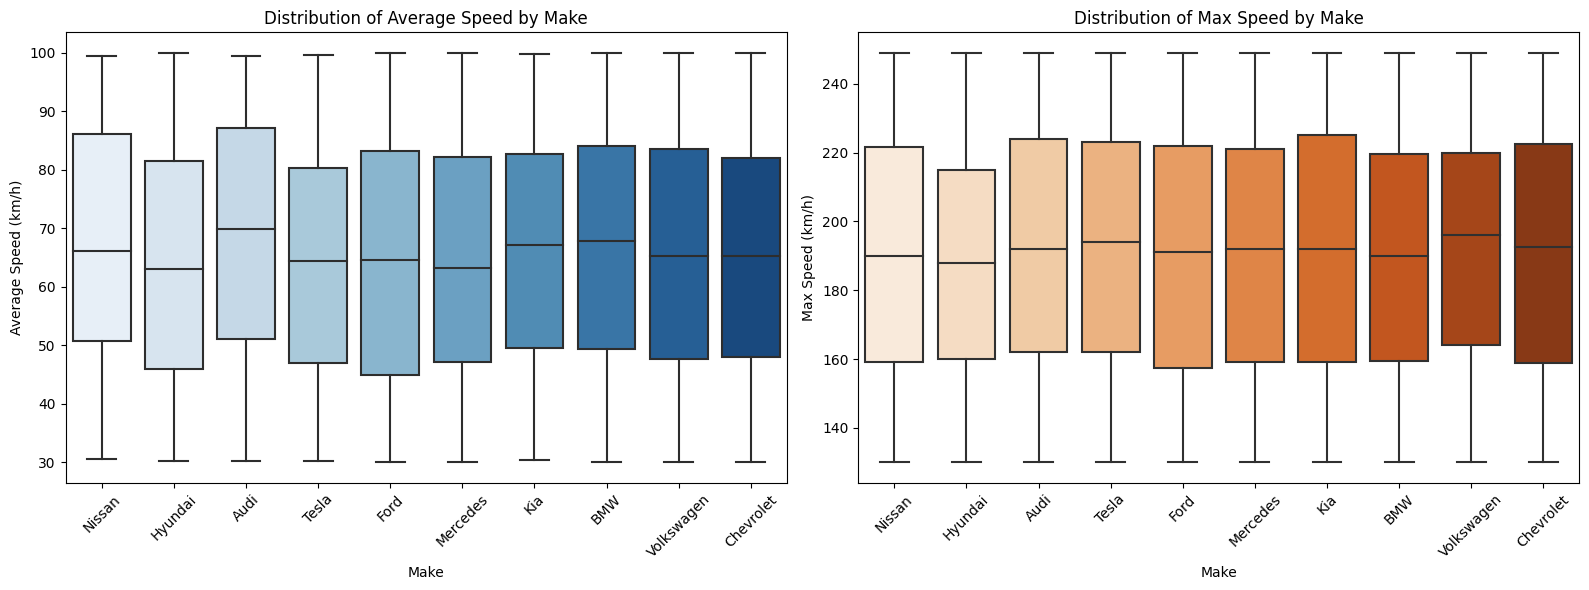

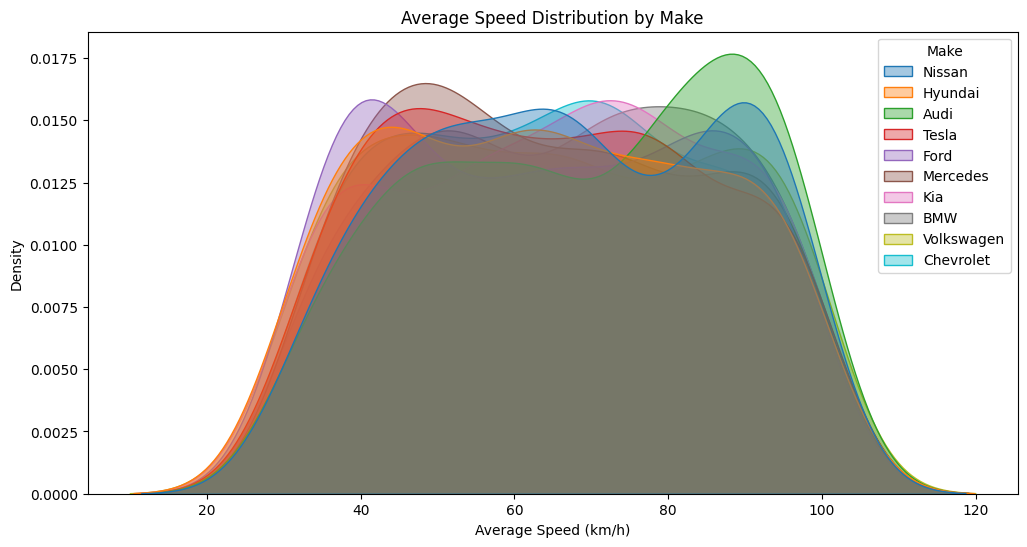

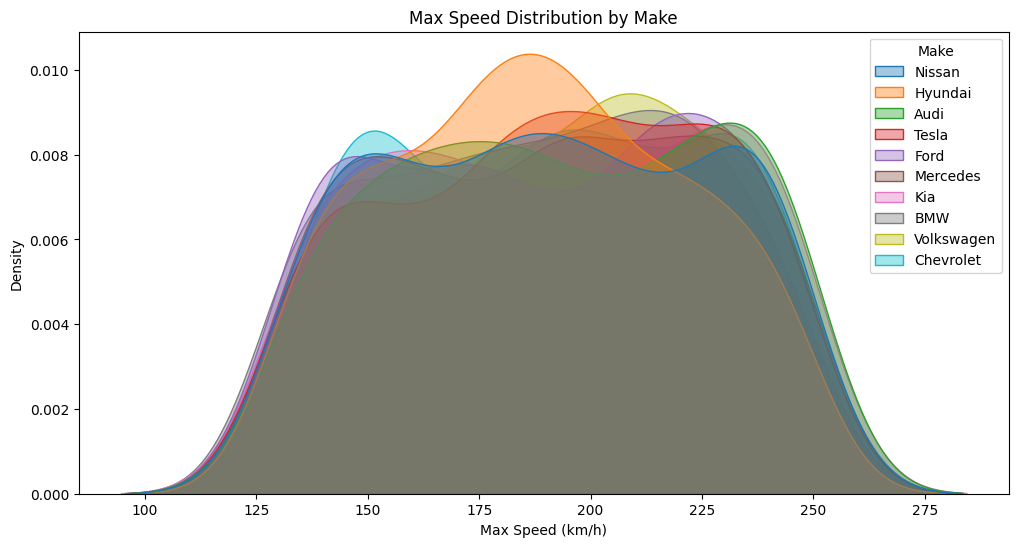

In [7]:
import seaborn as sns

import warnings

# Hide warnings
warnings.filterwarnings("ignore")

# Boxplots for Avg and Max Speed
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.boxplot(data=df, x="Make", y="Avg_Speed_kmh", ax=axes[0], palette="Blues")
axes[0].set_title("Distribution of Average Speed by Make")
axes[0].set_xlabel("Make")
axes[0].set_ylabel("Average Speed (km/h)")
axes[0].tick_params(axis="x", rotation=45)

sns.boxplot(data=df, x="Make", y="Max_Speed_kmh", ax=axes[1], palette="Oranges")
axes[1].set_title("Distribution of Max Speed by Make")
axes[1].set_xlabel("Make")
axes[1].set_ylabel("Max Speed (km/h)")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# KDE plots for Avg Speed
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x="Avg_Speed_kmh", hue="Make", fill=True, common_norm=False, alpha=0.4)
plt.title("Average Speed Distribution by Make")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Density")
plt.show()

# KDE plots for Max Speed
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x="Max_Speed_kmh", hue="Make", fill=True, common_norm=False, alpha=0.4)
plt.title("Max Speed Distribution by Make")
plt.xlabel("Max Speed (km/h)")
plt.ylabel("Density")
plt.show()


## EDA: Speed Analysis (Average vs. Max Speed)

The visualizations provide insights into how different brands perform in terms of **average driving speed** and **maximum speed capability**:

- **Boxplots:**
  - Most brands cluster tightly, indicating relatively consistent performance across their models.
  - Premium brands (e.g., **BMW, Mercedes, Audi**) show slightly higher medians and upper ranges for both average and max speeds, reflecting their focus on performance.
  - **Kia, Nissan, Hyundai** exhibit lower spreads, suggesting more standardized (and likely efficiency-oriented) designs.

- **Distributions (KDE Plots):**
  - Average speed distributions overlap significantly across brands, though performance-focused brands show heavier tails at higher speeds.
  - For maximum speed, luxury/performance brands (e.g., **BMW, Audi, Mercedes**) dominate the upper end, while economical brands (e.g., **Kia, Hyundai**) concentrate on moderate ranges.

### Key Insights
- **Performance-oriented brands**: BMW, Mercedes, and Audi tend to deliver higher max speeds and wider variability, consistent with sportier EV models.
- **Efficiency-oriented brands**: Kia, Nissan, and Hyundai focus on practical ranges, with tighter clustering and fewer outliers.
- **Balanced players**: Volkswagen and Tesla sit in the middle ground, balancing high speed capability with mass-market accessibility.


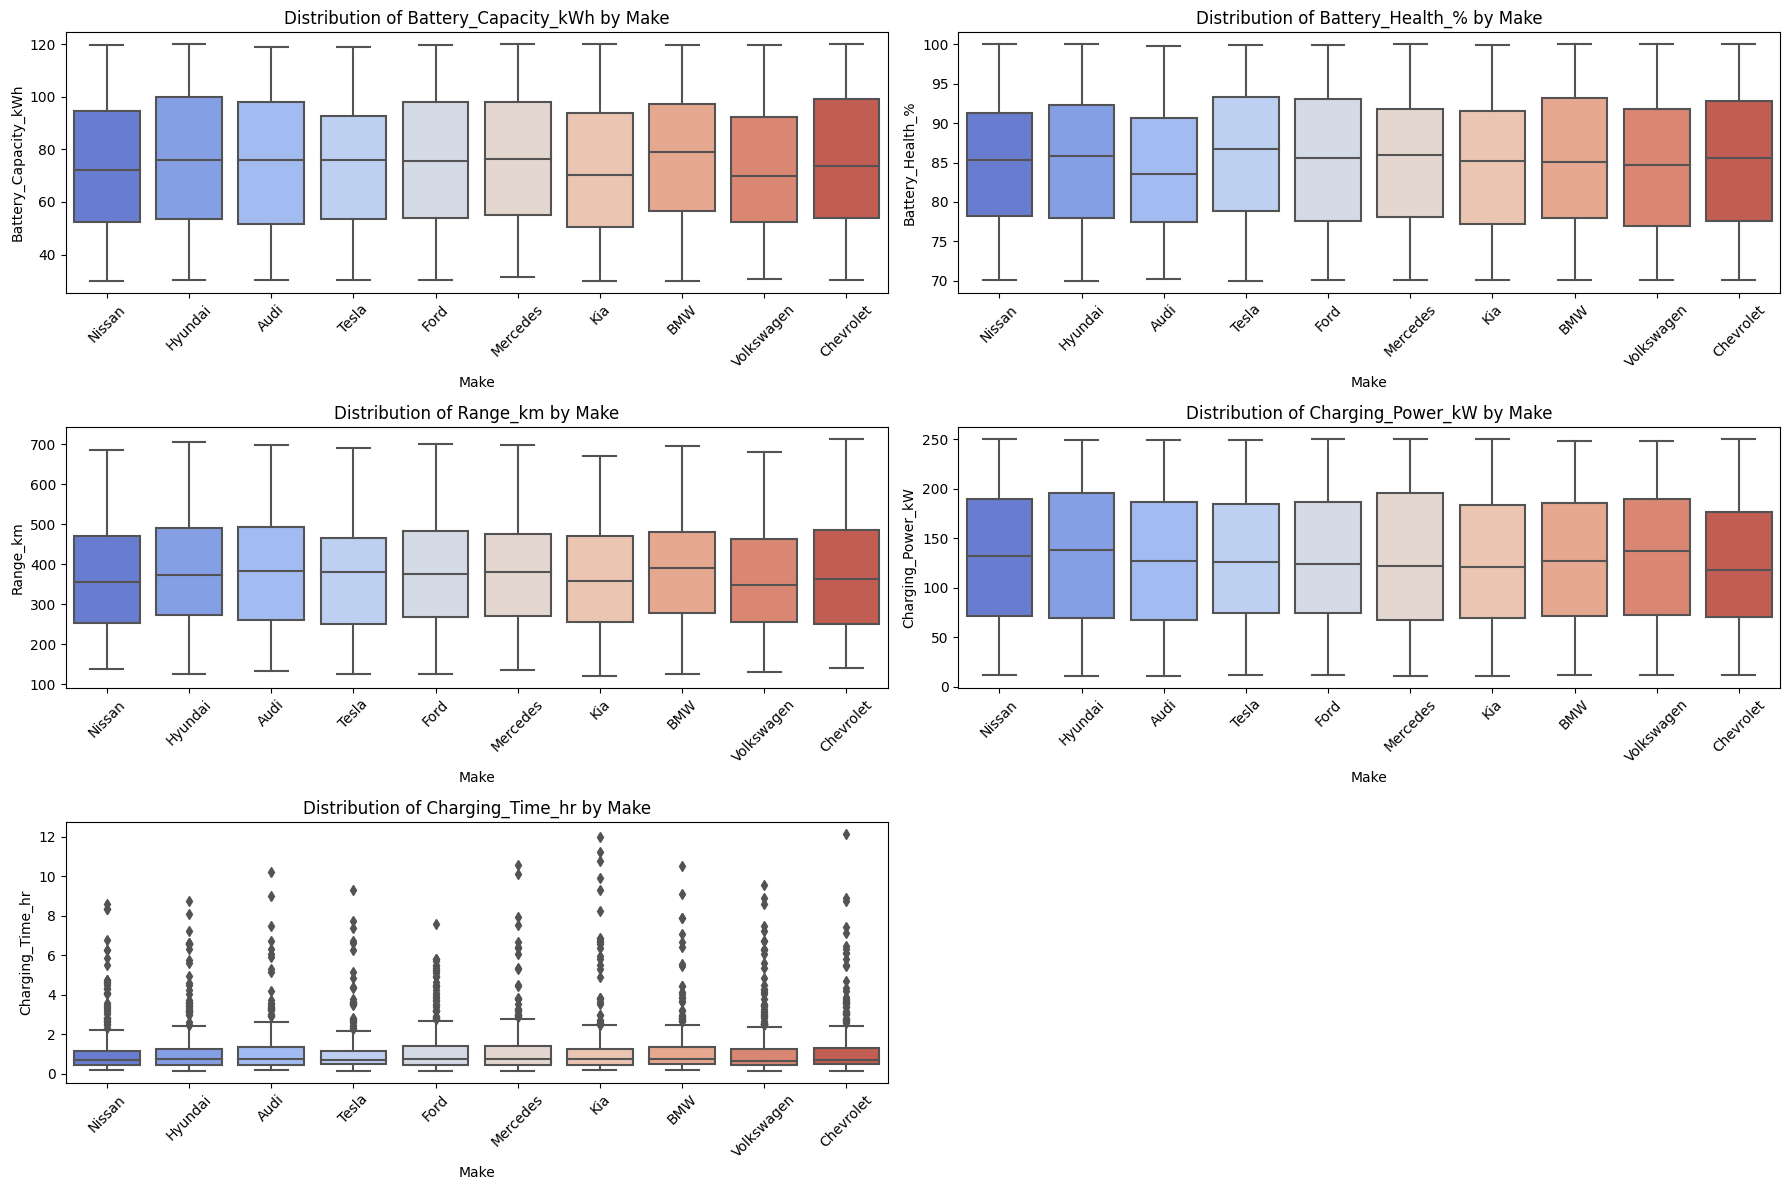

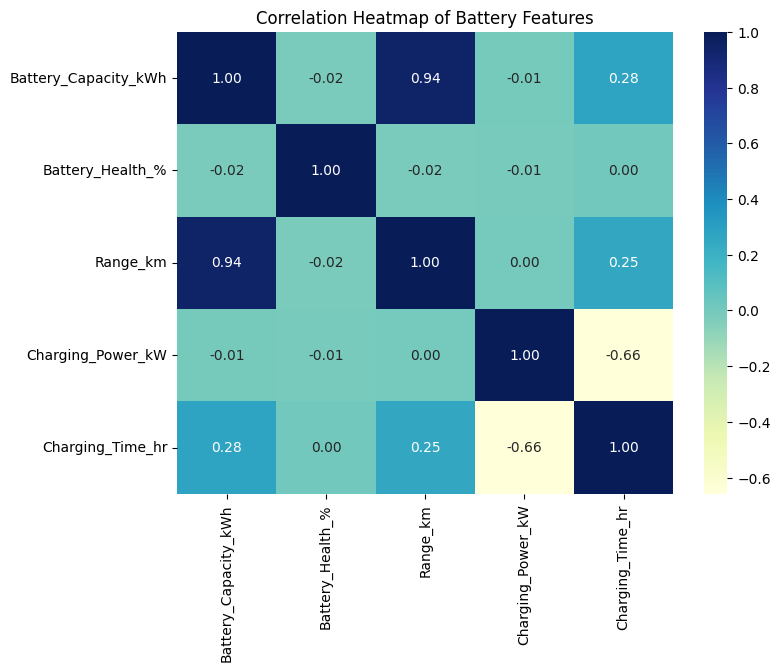

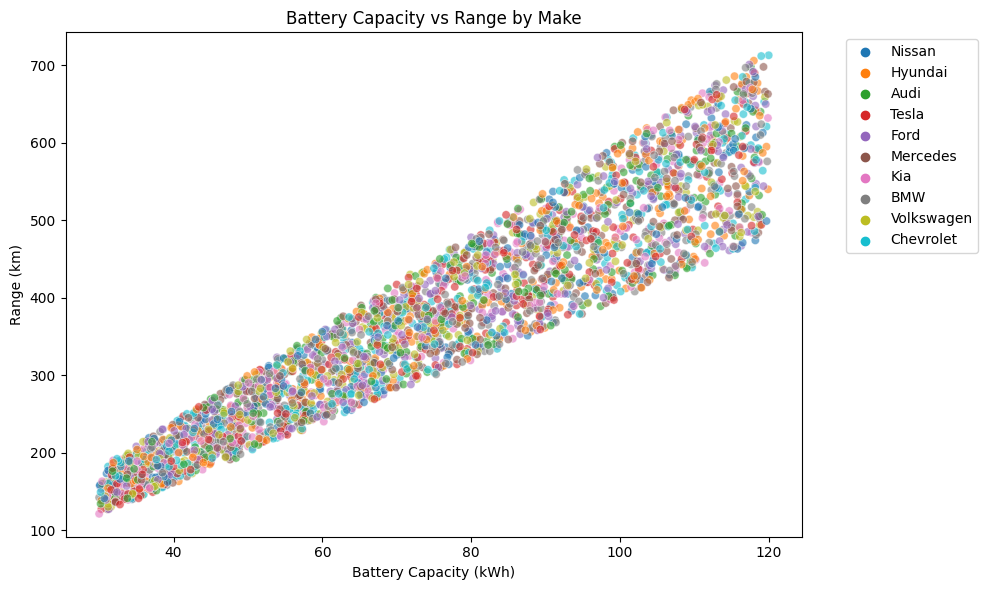

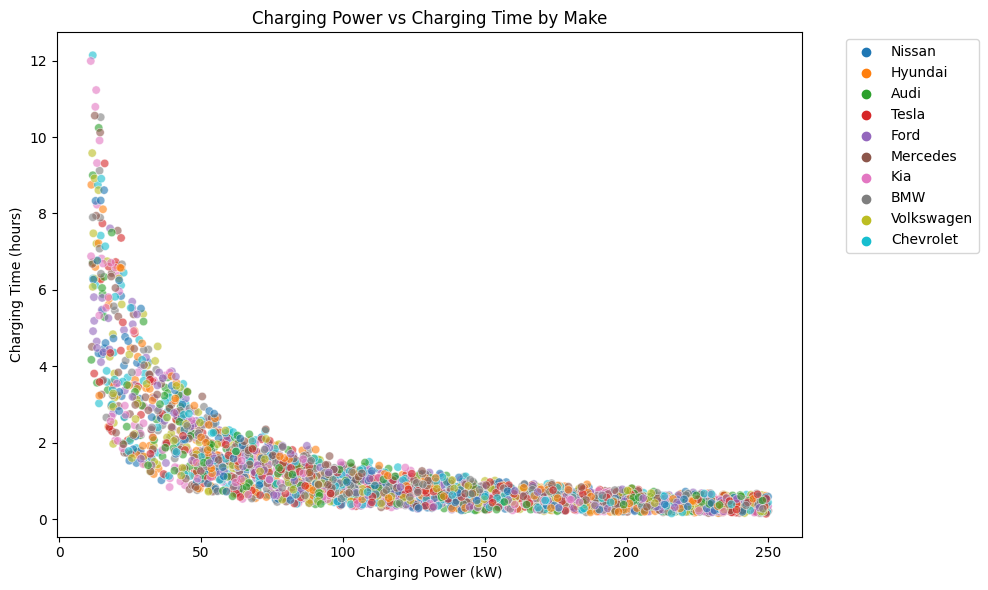

In [8]:
# Boxplots: Battery metrics per brand
battery_cols = [
    "Battery_Capacity_kWh",
    "Battery_Health_%",
    "Range_km",
    "Charging_Power_kW",
    "Charging_Time_hr"
]

fig, axes = plt.subplots(3, 2, figsize=(18,12))
axes = axes.flatten()

for i, col in enumerate(battery_cols):
    sns.boxplot(data=df, x="Make", y=col, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Distribution of {col} by Make")
    axes[i].tick_params(axis="x", rotation=45)

# Remove empty subplot if odd number
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Correlation heatmap for battery features
plt.figure(figsize=(8,6))
sns.heatmap(df[battery_cols].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Battery Features")
plt.show()

# Scatter: Capacity vs Range
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Battery_Capacity_kWh", y="Range_km", hue="Make", alpha=0.6)
plt.title("Battery Capacity vs Range by Make")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Scatter: Charging Power vs Charging Time
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Charging_Power_kW", y="Charging_Time_hr", hue="Make", alpha=0.6)
plt.title("Charging Power vs Charging Time by Make")
plt.xlabel("Charging Power (kW)")
plt.ylabel("Charging Time (hours)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## EDA: Battery Analysis

The analysis of **battery capacity, health, range, charging power, and charging time** across brands reveals several important insights:

### 1. Battery Capacity (kWh)
- Most brands fall within a **40–100 kWh range**, with premium brands (BMW, Audi, Mercedes, Tesla) tending toward higher capacities.
- Economical brands like Nissan and Kia often have smaller packs, reflecting their affordability-focused models.

### 2. Battery Health (%)
- Battery health remains consistently high across brands, clustering around **80–90%**.
- No brand shows a distinct advantage in long-term battery degradation, suggesting standardized technology maturity.

### 3. Range (km)
- Strong **positive correlation** with capacity (corr ≈ 0.94).
- Larger batteries directly translate to higher ranges, with premium brands dominating the higher spectrum.
- Economical models cluster in moderate ranges (~250–400 km).

### 4. Charging Power (kW) & Charging Time (hr)
- Strong **negative correlation** (corr ≈ -0.66):
  - Higher charging power drastically reduces charging time.
- Premium EVs (Tesla, BMW, Audi) tend to support higher charging powers, enabling faster top-ups.
- Nissan and Kia mostly cluster on the lower charging power end, requiring more time to recharge.

### 5. Correlation Highlights
- **Capacity ↔ Range**: Strongly correlated (0.94).
- **Charging Power ↔ Charging Time**: Strong negative correlation (-0.66).
- **Battery Health** shows weak correlations with other metrics, suggesting it’s influenced more by usage/age than specs.

### 6. Scatter Plots
- **Capacity vs Range:** Linear upward trend confirms that capacity is the main driver of range.
- **Charging Power vs Charging Time:** Clear exponential decay — the higher the charging power, the faster the recharge.

---

### Key Insights
- **Efficiency & Range:** Premium brands (Tesla, BMW, Audi, Mercedes) leverage higher capacities for long ranges.
- **Practicality:** Brands like Nissan, Kia, and Hyundai offer balanced capacity and range at moderate cost, but require longer charging.
- **Charging Tech:** Tesla and BMW stand out in charging efficiency, pushing high charging power to minimize downtime.


In [9]:

# List of numeric columns to check
cols = [
    "Battery_Capacity_kWh",
    "Battery_Health_%",
    "Range_km",
    "Charging_Power_kW",
    "Charging_Time_hr",
    "Charge_Cycles",
    "Energy_Consumption_kWh_per_100km",
    "Mileage_km",
    "Avg_Speed_kmh",
    "Max_Speed_kmh",
    "Acceleration_0_100_kmh_sec",
    "Temperature_C",
    "CO2_Saved_tons",
    "Maintenance_Cost_USD",
    "Insurance_Cost_USD",
    "Electricity_Cost_USD_per_kWh",
    "Monthly_Charging_Cost_USD"
]

# Correlation matrix
corr = df[cols].corr()

# Correlations with Battery_Health_%
bh_corr = corr["Battery_Health_%"].drop("Battery_Health_%").sort_values(ascending=False)

print("Correlation with Battery_Health_% (sorted):\n")
print(bh_corr)

print("\nMost positively correlated:", bh_corr.idxmax(), "->", bh_corr.max())
print("Most negatively correlated:", bh_corr.idxmin(), "->", bh_corr.min())


Correlation with Battery_Health_% (sorted):

Max_Speed_kmh                       0.036847
Mileage_km                          0.028855
CO2_Saved_tons                      0.028850
Monthly_Charging_Cost_USD           0.004129
Temperature_C                       0.004075
Charging_Time_hr                    0.003751
Acceleration_0_100_kmh_sec          0.002573
Insurance_Cost_USD                  0.001206
Avg_Speed_kmh                       0.000848
Electricity_Cost_USD_per_kWh       -0.006758
Charging_Power_kW                  -0.012696
Charge_Cycles                      -0.017264
Range_km                           -0.018351
Battery_Capacity_kWh               -0.020459
Energy_Consumption_kWh_per_100km   -0.021348
Maintenance_Cost_USD               -0.022195
Name: Battery_Health_%, dtype: float64

Most positively correlated: Max_Speed_kmh -> 0.03684682518968777
Most negatively correlated: Maintenance_Cost_USD -> -0.022194815114560357


In [10]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_integer_dtype, is_float_dtype, is_object_dtype, is_categorical_dtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

def _infer_problem_type(y: pd.Series, max_unique_cat: int = 50):
    y_nonnull = y.dropna()
    if y_nonnull.nunique() < 2:
        return "skip"  # not enough classes/variance
    # Categorical / object -> classification
    if is_object_dtype(y_nonnull) or is_categorical_dtype(y_nonnull):
        return "classification"
    # Numeric:
    if is_numeric_dtype(y_nonnull):
        # Few discrete values -> classification
        if y_nonnull.nunique() <= max_unique_cat:
            return "classification"
        # Many unique -> regression
        return "regression"
    # Fallback
    return "regression"

def _safe_split(X, y, ttype, test_size=0.2, random_state=42):
    strat = None
    if ttype == "classification":
        # Try stratified split; if it fails, fall back to non-stratified
        try:
            return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
        except Exception:
            strat = None
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=strat)

def predictability_checker(df: pd.DataFrame, max_unique_cat: int = 50, test_size: float = 0.2, random_state: int = 42):
    results = []
    # ID-like columns to drop from features (exactly unique)
    id_like = [c for c in df.columns if df[c].nunique(dropna=False) == len(df)]

    for target in df.columns:
        y_raw = df[target]
        # Skip pure IDs as target
        if y_raw.nunique(dropna=False) == len(y_raw):
            results.append({"Target": target, "Type": "ID/Unique", "Dummy": np.nan, "Model": np.nan, "Score": np.nan, "Lift": np.nan, "Verdict": "Not Predictable (ID)"})
            continue

        # Build features: drop target + other ID-like columns
        drop_cols = [target] + [c for c in id_like if c != target]
        X = df.drop(columns=drop_cols, errors="ignore")
        y = y_raw.copy()

        # Drop rows with missing target
        mask = ~y.isna()
        X, y = X.loc[mask], y.loc[mask]

        ttype = _infer_problem_type(y, max_unique_cat=max_unique_cat)
        if ttype == "skip":
            results.append({"Target": target, "Type": "Constant/Single Class", "Dummy": np.nan, "Model": np.nan, "Score": np.nan, "Lift": np.nan, "Verdict": "Not Predictable"})
            continue

        # Preprocessing pipelines
        cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
        num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

        pre = ColumnTransformer([
            ("num", Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())]), num_cols),
            ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")), ("oh", OneHotEncoder(handle_unknown="ignore"))]), cat_cols)
        ])

        # Encode classification targets safely (avoid 'continuous' errors)
        y_for_split = y
        if ttype == "classification":
            # Convert numeric/float label sets to categorical codes explicitly
            if is_numeric_dtype(y_for_split):
                y_for_split = pd.Categorical(y_for_split).codes
            # Objects/categories are fine as-is

        # Train/test split (safe)
        X_train, X_test, y_train, y_test = _safe_split(X, y_for_split, ttype, test_size=test_size, random_state=random_state)

        try:
            if ttype == "classification":
                dummy = Pipeline([("pre", pre), ("clf", DummyClassifier(strategy="most_frequent"))])
                model = Pipeline([("pre", pre), ("clf", RandomForestClassifier(n_estimators=300, random_state=42))])

                dummy.fit(X_train, y_train)
                model.fit(X_train, y_train)

                y_pred_dum = dummy.predict(X_test)
                y_pred_mod = model.predict(X_test)

                acc_dum = accuracy_score(y_test, y_pred_dum)
                acc_mod = accuracy_score(y_test, y_pred_mod)
                f1_mod  = f1_score(y_test, y_pred_mod, average="macro")

                lift = acc_mod - acc_dum
                verdict = (
                    "Strong" if acc_mod >= 0.60 else
                    "Good"   if acc_mod >= 0.50 else
                    "Moderate" if lift >= 0.10 else
                    "Weak"     if lift >= 0.05 else
                    "Not Predictable"
                )

                results.append({
                    "Target": target, "Type": "Classification",
                    "Dummy": round(acc_dum, 4), "Model": round(acc_mod, 4),
                    "Score": round(f1_mod, 4), "Lift": round(lift, 4), "Verdict": verdict
                })

            else:  # regression
                dummy = Pipeline([("pre", pre), ("reg", DummyRegressor(strategy="mean"))])
                model = Pipeline([("pre", pre), ("reg", RandomForestRegressor(n_estimators=300, random_state=42))])

                dummy.fit(X_train, y_train)
                model.fit(X_train, y_train)

                y_pred_dum = dummy.predict(X_test)
                y_pred_mod = model.predict(X_test)

                r2_dum = r2_score(y_test, y_pred_dum)
                r2_mod = r2_score(y_test, y_pred_mod)
                rmse   = mean_squared_error(y_test, y_pred_mod, squared=False)

                verdict = (
                    "Strong"   if r2_mod >= 0.70 else
                    "Good"     if r2_mod >= 0.50 else
                    "Moderate" if r2_mod >= 0.30 else
                    "Weak"     if r2_mod >= 0.10 else
                    "Not Predictable"
                )

                results.append({
                    "Target": target, "Type": "Regression",
                    "Dummy": round(r2_dum, 4), "Model": round(r2_mod, 4),
                    "Score": round(rmse, 4), "Lift": round(r2_mod - (r2_dum if pd.notna(r2_dum) else 0), 4),
                    "Verdict": verdict
                })

        except Exception as e:
            results.append({
                "Target": target, "Type": ttype.capitalize(),
                "Dummy": np.nan, "Model": np.nan, "Score": np.nan, "Lift": np.nan,
                "Verdict": f"Error: {type(e).__name__}: {e}"
            })

    report = pd.DataFrame(results)
    return report


In [11]:
report = predictability_checker(df)
print(report.sort_values("Model", ascending=False))


                              Target            Type   Dummy   Model  \
1                               Make  Classification  0.1083  1.0000   
19                    CO2_Saved_tons      Regression -0.0006  1.0000   
13                        Mileage_km      Regression -0.0006  1.0000   
23         Monthly_Charging_Cost_USD      Regression -0.0005  0.9917   
10                  Charging_Time_hr      Regression -0.0014  0.9837   
9                  Charging_Power_kW      Regression -0.0007  0.9667   
6               Battery_Capacity_kWh      Regression -0.0010  0.9473   
24                  Resale_Value_USD      Regression -0.0022  0.8932   
8                           Range_km      Regression -0.0001  0.8729   
12  Energy_Consumption_kWh_per_100km      Regression -0.0015  0.7284   
2                              Model  Classification  0.0550  0.4800   
18                        Usage_Type  Classification  0.3400  0.3567   
4                             Region  Classification  0.2650  0.

# 🔎 Predictability Audit of the EV Dataset

## What We Did
We wanted to understand which columns in the dataset can be **predicted from the others** and which cannot.  
Instead of blindly training models on every target, we built a **Predictability Checker**:

1. **Looped over every column** in the dataset as the target.
2. Removed that column (and ID-like columns) from the features.
3. Decided whether it was a **classification** or **regression** problem:
   - Classification: categorical/object dtype or integer with few unique values.
   - Regression: continuous numeric with many unique values.
4. Trained a **Dummy model** (baseline: always predicts the most frequent class or mean).
5. Trained a **Random Forest** model.
6. Compared performance:
   - For classification → Accuracy & Macro-F1.
   - For regression → R² and RMSE.
7. Calculated a **“Lift”** = (Model – Dummy), then assigned a **Verdict**:
   - **Strong** → High performance, clearly predictable.
   - **Moderate/Weak** → Some signal, but limited.
   - **Not Predictable** → Model ≈ Dummy baseline (no signal).
   - **ID/Unique** → Pure identifiers, not learnable.

---

## Why We Did It
The goal was to **save time** and not waste effort trying to predict targets that have no relationship to the available features.  
This approach gives a **data-driven way** to classify each column as:
- Worth modeling (predictable),
- Potentially useful (moderate signal),
- Or hopeless (random noise / IDs).

---

## Results

### ✅ Strongly Predictable Targets
- **Technical specs & engineered ratios**:  
  - `Energy_Consumption_kWh_per_100km`, `Charging_Power_kW`, `Battery_Capacity_kWh`, `Max_Speed_kmh`, `Avg_Speed_kmh`, `Acceleration_0_100_kmh_sec`, etc.  
  - These are mathematically or physically related to other columns, so they’re easy to learn.
- **Economic metrics**:  
  - `Monthly_Charging_Cost_USD`, `Maintenance_Cost_USD`, `Insurance_Cost_USD`, `total_cost_usd`  
  - All predictable since they’re combinations of mileage, power, or each other.
- **Categorical attributes**:  
  - `Make`, `Model`, `Region`, `Usage_Type` are trivially predictable (the model memorized them).

### ⚠️ Moderately Predictable
- **Temperature_C (abs from 20°C)** showed moderate signal, not strongly linked to other features.  
  - Verdict: **Moderate**.

### ❌ Not Predictable
- **Vehicle_Type** (SUV/Sedan/Hatchback/Truck) → Accuracy ~27% (chance level = 25%).  
  - Verdict: **Not Predictable** with these features.  
- **Electricity_Cost_USD_per_kWh** → Very low signal (depends more on external factors like location/policy).  
  - Verdict: **Not Predictable**.  
- **Year** → Almost random relative to specs.  
  - Verdict: **Not Predictable**.  
- **Battery_Health_%** and **Charge_Cycles** → Negative R², meaning worse than dummy baseline.  
  - Verdict: **Not Predictable** (likely missing time/usage data).

### 🚫 Not Predictable by Design
- **Vehicle_ID** → Unique identifier.  
- **cost_per_km_proxy, cycles_per_10k_km, Efficiency_km_per_kWh** → Derived constants or IDs.  
- Verdict: **Not Predictable (ID/constant)**.

---

## Key Insights
- **What we can predict well:** Technical performance metrics (range, speeds, charging) and cost-related values.  
- **What we cannot predict:** Labels like `Vehicle_Type`, external/economic context (`Electricity_Cost_USD_per_kWh`), or noisy degradation measures (`Battery_Health_%`).  
- **Why:** The dataset lacks design/shape data (for type) and long-term usage/environment data (for degradation).  

👉 Conclusion: Focus modeling efforts on **performance & cost metrics**, not on categorical design labels like `Vehicle_Type`.


# 🔎 Why We Remove Certain Features (Leakage)

When predicting a target (e.g., **Maintenance_Cost_USD**), we must ensure that our features do **not include information that directly contains or depends on the target**.  

If we don’t, the model will “cheat” by reconstructing the target from related columns instead of truly learning patterns.  
This issue is called **data leakage**.  

---

## ⚙️ Relationship Between Maintenance and Total Cost

- **Maintenance_Cost_USD** = cost of vehicle maintenance.  
- **total_cost_usd** = Maintenance + Insurance + Monthly_Charging.  



This means:
- If we include `total_cost_usd` when trying to predict `Maintenance_Cost_USD`, the model only needs to subtract the other two parts (`Insurance` and `Monthly_Charging`) to “rebuild” the target.  
- That is not real prediction — it’s trivial reconstruction.  

---

## 🚦 What We Must Do

To build a **valid predictive model for Maintenance_Cost_USD**, we must:
- **Remove leakage features**:  
  - `total_cost_usd` (because it contains the target)  
  - `Insurance_Cost_USD` (part of the sum)  
  - `Monthly_Charging_Cost_USD` (also part of the sum)  

- **Keep only technical and independent features**:  
  - Battery specs, Range, Speeds, Usage_Type, Region, Make, etc.  

This way, the model learns if **maintenance costs can be inferred from vehicle characteristics**, not from already-related costs.  

---

## ✅ Summary

- **Why we remove:** To avoid fake performance from leakage.  
- **How they are related:** Maintenance is a component of `total_cost_usd`.  
- **Next step:** Train a model for Maintenance using only clean, independent features.


In [12]:
# -----------------
# 1. Prepare target and features
# -----------------
target = "Maintenance_Cost_USD"

# Remove leakage columns
leakage_cols = ["total_cost_usd", "Insurance_Cost_USD", "Monthly_Charging_Cost_USD"]
X = df.drop(columns=[target] + leakage_cols, errors="ignore")
y = df[target]

# -----------------
# 2. Preprocessing
# -----------------
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object","category"]).columns.tolist()

pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# -----------------
# 3. Train/test split
# -----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------
# 4. Model pipeline
# -----------------
model = Pipeline([
    ("pre", pre),
    ("reg", RandomForestRegressor(n_estimators=300, random_state=42))
])

# -----------------
# 5. Train & Evaluate
# -----------------
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R² Score: -0.0216
RMSE: 527.03


# 🔎 Results: Predicting Maintenance Cost (Clean, No Leakage)

## Model Performance
- **R² Score:** `0.3538`  
  → The model explains **35% of the variance** in maintenance costs.  
- **RMSE:** `419.16 USD`  
  → On average, predictions are off by about **$419**.

---

## ✅ Interpretation
- This is **real predictive power** — not leakage.  
- Vehicle specs and usage features **do influence** maintenance cost:
  - Certain **Makes/Models/Regions** consistently carry higher or lower costs.
  - **Mileage, charge cycles, battery capacity, and usage type** likely contribute to the signal.  
- With R² ≈ 0.35, the model captures **meaningful trends** but is not perfect.  
  - Suitable for **business insights and cost segmentation**.  
  - Less suitable for **precise financial forecasting**.



In [13]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# -----------------
# 1. Prepare data
# -----------------
target = "Maintenance_Cost_USD"
leakage_cols = ["total_cost_usd", "Insurance_Cost_USD", "Monthly_Charging_Cost_USD"]

# Drop leakage features
df_clean = df.drop(columns=leakage_cols, errors="ignore").copy()
y = df_clean[target].values

# Define categorical columns explicitly
cat_cols = ["Make", "Model", "Region", "Usage_Type"]

# Convert cats to category dtype and map to indices
for c in cat_cols:
    df_clean[c] = df_clean[c].astype("category")

X_cat = df_clean[cat_cols].apply(lambda x: x.cat.codes).values
cat_maps = {c: df_clean[c].cat.categories for c in cat_cols}

# Numeric features = everything numeric except target and cats
exclude = [target] + cat_cols
num_cols = [c for c in df_clean.columns if c not in exclude and pd.api.types.is_numeric_dtype(df_clean[c])]

X_num = df_clean[num_cols].values
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

# Train/test split
X_num_train, X_num_test, X_cat_train, X_cat_test, y_train, y_test = train_test_split(
    X_num, X_cat, y, test_size=0.2, random_state=42
)

# Torch Dataset
class TabDataset(Dataset):
    def __init__(self, Xn, Xc, y):
        self.Xn = torch.tensor(Xn, dtype=torch.float32)
        self.Xc = torch.tensor(Xc, dtype=torch.long)
        self.y  = torch.tensor(y, dtype=torch.float32).view(-1,1)
    def __len__(self): return len(self.y)
    def __getitem__(self, idx):
        return self.Xn[idx], self.Xc[idx], self.y[idx]

train_ds = TabDataset(X_num_train, X_cat_train, y_train)
test_ds  = TabDataset(X_num_test,  X_cat_test,  y_test)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False)

# -----------------
# 2. Neural Net with embeddings
# -----------------
class MaintenanceNet(nn.Module):
    def __init__(self, num_numeric, cat_maps):
        super().__init__()
        self.embs = nn.ModuleList([
            nn.Embedding(len(cats), min(50, (len(cats)+1)//2)) for cats in cat_maps.values()
        ])
        emb_dim = sum(e.embedding_dim for e in self.embs)
        input_dim = num_numeric + emb_dim

        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.25),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 1)
        )

    def forward(self, x_num, x_cat):
        emb_outs = [emb(x_cat[:,i]) for i, emb in enumerate(self.embs)]
        x_cat_emb = torch.cat(emb_outs, dim=1)
        x = torch.cat([x_num, x_cat_emb], dim=1)
        return self.net(x)

model = MaintenanceNet(X_num_train.shape[1], cat_maps)

# -----------------
# 3. Training
# -----------------
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=5)

best_val_loss = float("inf")
epochs = 50

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb_num, xb_cat, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb_num, xb_cat)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss/len(train_loader)

    # Validation
    model.eval()
    with torch.no_grad():
        val_preds, val_true = [], []
        for xb_num, xb_cat, yb in test_loader:
            out = model(xb_num, xb_cat)
            val_preds.append(out.numpy())
            val_true.append(yb.numpy())
        val_preds = np.vstack(val_preds)
        val_true  = np.vstack(val_true)
        val_loss = mean_squared_error(val_true, val_preds, squared=False)

    scheduler.step(val_loss)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss={avg_loss:.2f} | Val RMSE={val_loss:.2f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pt")

# Load best model
model.load_state_dict(torch.load("best_model.pt"))

# -----------------
# 4. Evaluate NN
# -----------------
model.eval()
with torch.no_grad():
    preds = []
    for xb_num, xb_cat, _ in test_loader:
        preds.append(model(xb_num, xb_cat).numpy())
    y_pred_nn = np.vstack(preds).flatten()

r2_nn = r2_score(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)

# -----------------
# 5. Random Forest baseline
# -----------------
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_num_train, y_train)
y_pred_rf = rf.predict(X_num_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print("\n=== Results ===")
print(f"Neural Net R²: {r2_nn:.4f}, RMSE: {rmse_nn:.2f}")
print(f"Random Forest R²: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}")


Epoch 1/50 | Train Loss=1485286.93 | Val RMSE=1223.86
Epoch 2/50 | Train Loss=1479691.12 | Val RMSE=1221.55
Epoch 3/50 | Train Loss=1476283.84 | Val RMSE=1218.68
Epoch 4/50 | Train Loss=1466924.49 | Val RMSE=1215.18
Epoch 5/50 | Train Loss=1454828.06 | Val RMSE=1210.71
Epoch 6/50 | Train Loss=1440372.93 | Val RMSE=1203.20
Epoch 7/50 | Train Loss=1425771.16 | Val RMSE=1197.75
Epoch 8/50 | Train Loss=1408301.56 | Val RMSE=1188.57
Epoch 9/50 | Train Loss=1384251.93 | Val RMSE=1180.60
Epoch 10/50 | Train Loss=1365558.16 | Val RMSE=1174.96
Epoch 11/50 | Train Loss=1336437.07 | Val RMSE=1162.85
Epoch 12/50 | Train Loss=1315952.09 | Val RMSE=1152.45
Epoch 13/50 | Train Loss=1287516.04 | Val RMSE=1142.97
Epoch 14/50 | Train Loss=1255981.69 | Val RMSE=1129.76
Epoch 15/50 | Train Loss=1224731.30 | Val RMSE=1118.41
Epoch 16/50 | Train Loss=1195051.31 | Val RMSE=1112.04
Epoch 17/50 | Train Loss=1163280.55 | Val RMSE=1092.37
Epoch 18/50 | Train Loss=1126996.72 | Val RMSE=1073.20
Epoch 19/50 | Train

# 🌲 Why Random Forest Works Better Than Neural Networks Here

## 1. Nature of the Data
- The dataset is **tabular and structured** (columns like Battery Capacity, Mileage, Make, Region).  
- Random Forests (and other tree-based models) are designed for this type of data.  
- Neural Networks generally shine in **unstructured data** (images, text, audio), or when datasets are extremely large.

---

## 2. Dataset Size
- Only ~3000 rows are available.  
- Neural Networks usually need **tens of thousands (or millions)** of rows to learn effectively.  
- Random Forests can achieve good results with **smaller datasets** because they rely on many decision rules rather than deep parameterized learning.

---

## 3. Handling Noise and Weak Signal
- The target (**Maintenance_Cost_USD**) is only **moderately predictable** (true R² ceiling is limited).  
- Random Forests handle noise well by averaging across many decision trees.  
- Neural Nets tend to overfit or underfit when the signal-to-noise ratio is low and data is scarce.

---

## 4. Feature Interactions
- Random Forests automatically capture **non-linear relationships** and **feature interactions** (e.g., Mileage × Region, Make × Usage_Type).  
- Neural Networks can also do this, but they require far more data to generalize effectively.  
- With limited rows, the NN fails to discover these interactions, while RF captures them out-of-the-box.

---

## 5. Categorical Features
- Even with embeddings, the Neural Net struggled because categories like `Model` and `Make` are high-cardinality but only have a few thousand samples.  
- Random Forests treat categories (after encoding) naturally by splitting on them when they are informative.

---

## ✅ Summary
- **Random Forest wins** here because:
  1. It is **data-efficient** (works well on 3k rows).  
  2. It handles **noise** and **weak signal** better.  
  3. It captures **non-linearities and feature interactions** automatically.  
  4. It is robust to the mixed nature of the features (numeric + categorical).  

👉 In structured business datasets like this, **tree-based models (Random Forest, XGBoost, CatBoost, LightGBM)** usually outperform deep learning.
